<a href="https://colab.research.google.com/github/lydiasu1/pythonanalysis/blob/master/Pythonanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lien de la dataset : https://archive.ics.uci.edu/ml/datasets/PPG-DaLiA

PPG-DaLiA contains data from 15 subjects wearing physiological and motion sensors, providing a PPG dataset for motion compensation and heart rate estimation in Daily Life Activities.

Objectif : Classification -> Prédire l'activité de la personne

Enregistrement des données sur 15 personnes
Informations de ces 15 personnes dans SX_quest.csv
Informations sur les activités et leur durées : Table 2


A faire : 
- Comprendre comment utiliser rpeaks

Faites : 


In [1]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00495/data.zip --output data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2731M  100 2731M    0     0  72.7M      0  0:00:37  0:00:37 --:--:-- 78.2M


In [2]:
!unzip data

Archive:  data
   creating: PPG_FieldStudy/
  inflating: PPG_FieldStudy/PPG_FieldStudy_readme.pdf  
   creating: PPG_FieldStudy/S1/
   creating: PPG_FieldStudy/S10/
  inflating: PPG_FieldStudy/S10/S10.pkl  
  inflating: PPG_FieldStudy/S10/S10_activity.csv  
  inflating: PPG_FieldStudy/S10/S10_E4.zip  
  inflating: PPG_FieldStudy/S10/S10_quest.csv  
  inflating: PPG_FieldStudy/S10/S10_RespiBAN.h5  
   creating: PPG_FieldStudy/S11/
  inflating: PPG_FieldStudy/S11/S11.pkl  
  inflating: PPG_FieldStudy/S11/S11_activity.csv  
  inflating: PPG_FieldStudy/S11/S11_E4.zip  
  inflating: PPG_FieldStudy/S11/S11_quest.csv  
  inflating: PPG_FieldStudy/S11/S11_RespiBAN.h5  
   creating: PPG_FieldStudy/S12/
  inflating: PPG_FieldStudy/S12/S12.pkl  
  inflating: PPG_FieldStudy/S12/S12_activity.csv  
  inflating: PPG_FieldStudy/S12/S12_E4.zip  
  inflating: PPG_FieldStudy/S12/S12_quest.csv  
  inflating: PPG_FieldStudy/S12/S12_RespiBAN.h5  
   creating: PPG_FieldStudy/S13/
  inflating: PPG_FieldStudy/

# **Compréhension de la data**
Je réalise des analyses que sur le sujet 1 pour comprendre le sens de la donnée

In [0]:
import pandas as pd

df= pd.read_pickle("./PPG_FieldStudy/S1/S1.pkl")

In [4]:
#Organisation de la data
print(f"La data est organisée en différentes catégories : {list(df.keys())}")

#ID du sujet
print(f"Il s'agit du sujet : {df['subject']}")

#Caractéristiques du sujet (Poids, genre, age, taille, couleur de peau, niveau de sportivité)

print(f"Les caractéristiques du sujet sont les suivantes : {df['questionnaire']}")

#Les activités sont sous forme d'array
print(f'Activités : {df["activity"]} \n Taille de l\'array : {len(df["activity"])}')

La data est organisée en différentes catégories : ['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject']
Il s'agit du sujet : S1
Les caractéristiques du sujet sont les suivantes : {'WEIGHT': 78.0, 'Gender': ' m', 'AGE': 34, 'HEIGHT': 182.0, 'SKIN': 3, 'SPORT': 6}
Activités : [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]] 
 Taille de l'array : 36848


## Activity :

In [0]:
def plot_activity(data,name_column):
  import matplotlib.pyplot as plt
  import seaborn as sns
  import numpy as np
  sns.set_style('whitegrid')
  unique, counts = np.unique(data[name_column], return_counts=True)
  dict(zip(unique, counts))
  plt.figure(figsize=(10,5))
  sns.barplot(unique, counts, alpha=0.8)
  for i in range(len(unique)):
    plt.text(x = unique[i]-0.2 , y = counts[i]+10, s = counts[i], size = 10)
  plt.title('Visualisation de la répartition des activités')
  plt.ylabel("Nombres d'occurences", fontsize=12)
  plt.xlabel('Numéro des activités', fontsize=12)
  plt.show()

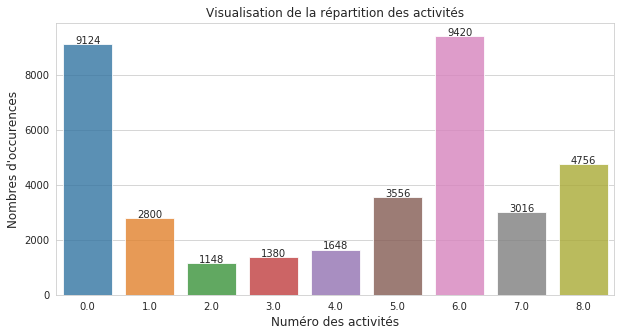

In [6]:
plot_activity(df,'activity')
#A voir après si on conserve les numéros ou on les remplace par leur noms

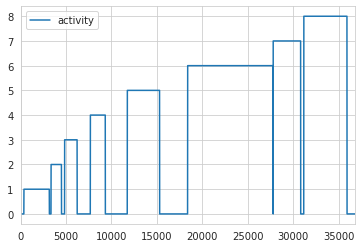

In [7]:
activity = pd.DataFrame(df['activity'],columns=['activity'])
activity.plot(y='activity', use_index=True)

D'après l'histogramme, les activités les plus réalisées par notre sujet 1 est l'acitvité 0 c'est à dire la période de transition entre les activités et l'activité 6 qui est la pause déjeuner

On voit bien dans le deuxième graphique les périodes de transition (Quand activité = 0) et on voit bien que l'activité 6 a pris un temps plus important que les autres activités

##Rpeaks : 

In [8]:
import numpy as np
unique, counts = np.unique(df['rpeaks'], return_counts=True)
dico_rpeaks = sorted(dict(zip(unique, counts)))
#Ce sont des index donc normalement valeurs uniques
print('En enlevant les doublons : ',len(set(df['rpeaks'])),'\nSans doublons :  ',len(df['rpeaks']))
print(f'Les valeurs de rpeaks pour le sujet 1 sont comprises entre {min(dico_rpeaks)} et {max(dico_rpeaks)}.La taille de l array est de {len(df["rpeaks"])}')

#D'après le readme, rpeaks correspond aux index qui référent aux EGC signal inclus dans label

En enlevant les doublons :  11431 
Sans doublons :   11431
Les valeurs de rpeaks pour le sujet 1 sont comprises entre 240 et 6448224.La taille de l array est de 11431


## Label : 

In [9]:
print(f"""Label est de type {type(df['label'])}.
Les valeurs sont de type {type(df['label'][0])}
Son minimum est {min(df['label'])}
Son maximum est {max(df['label'])}
La taille de l'array est de {len(df['label'])}
""")

Label est de type <class 'numpy.ndarray'>.
Les valeurs sont de type <class 'numpy.float64'>
Son minimum est 41.86246685820639
Son maximum est 150.15457212632637
La taille de l'array est de 4603



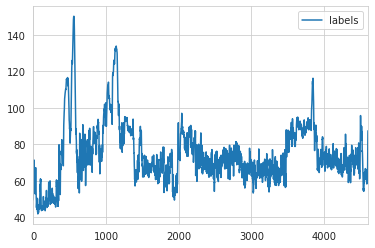

In [10]:
label = pd.DataFrame(df['label'],columns=['labels'])
label
label.plot(y='labels', use_index=True)


Nous avons fait un plot représentant les données dans de la colonne label. Il s'agit de la représentation dans le temps du ground truth heart rate information.

## Lien etre label et activity :

Aide du ReadMe :
-  activity-signal with 4 Hz sampling rate 
- 

In [11]:
taille_activite = len(df['activity'])
taille_label = len(df['label'])
print(f"""

Taille de la data activité : {taille_activite}
Taille de la data label    : {taille_label}

Dans les données, ils nous parlent de windows de 8s. Ils ont fait une moyenne des battements de coeurs tous les 8 secondes.

Multiplication des deux variables : {taille_label*8}
Nombres de valeurs divisé par la fréquence : {taille_activite/4}
Différence est de : {taille_activite - taille_label*8}

""")



Taille de la data activité : 36848
Taille de la data label    : 4603

Dans les données, ils nous parlent de windows de 8s. Ils ont fait une moyenne des battements de coeurs tous les 8 secondes.

Multiplication des deux variables : 36824
Nombres de valeurs divisé par la fréquence : 9212.0
Différence est de : 24




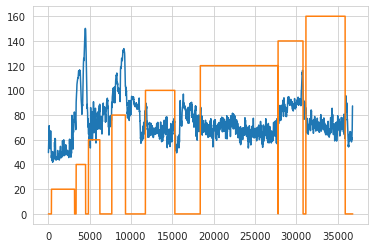

In [12]:
import matplotlib.pyplot as plt

plt.plot(label.index*8, label['labels'])

#Multiplier par 20 pour l'échelle
plt.plot(activity.index,activity['activity']*20)
plt.show()

On peut remarquer des segmentations similaires c'est à dire que les battements de coeur ont l'air de changer selon l'activité

##Signal :

In [13]:
print(f"Dans signal, nous avons un dataset en {len(df['signal'].keys())} parties : {list(df['signal'].keys())})")
print(f"""

Dans chest, nous avons la structure suivante : {list(df['signal'].get('chest').keys())}
Dans wrist, nous avons la structure suivante : {list(df['signal'].get('wrist').keys())}

""")

Dans signal, nous avons un dataset en 2 parties : ['chest', 'wrist'])


Dans chest, nous avons la structure suivante : ['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']
Dans wrist, nous avons la structure suivante : ['ACC', 'BVP', 'EDA', 'TEMP']




In [0]:
#Divisé en deux : Chest et wrist
df_chest = pd.DataFrame()
for i in df.get('signal').get('chest').keys():
  column = df.get('signal').get('chest').get(i)
  df_chest[i] = column.tolist()

In [39]:
len(df.get('signal').get('chest').get('ACC'))
df.get('signal').get('chest').get('Temp')

array([[-273.15],
       [-273.15],
       [-273.15],
       ...,
       [-273.15],
       [-273.15],
       [-273.15]], dtype=float32)

In [0]:
for i in df_chest.keys():
  if (i == 'ACC'):
    acc1 = df_chest[i].apply(lambda x: x[0])
    acc2 = df_chest[i].apply(lambda x: x[1])
    acc3 = df_chest[i].apply(lambda x: x[2])
    df_chest['ACC1'] = acc1
    df_chest['ACC2'] = acc2
    df_chest['ACC3'] = acc3
  else:
    new_data = df_chest[i].apply(lambda x: x[0])
    df_chest[i]=new_data

ACC : 3 dimensions
ECG :
EMG : 
DA :
Temp : 
Resp :

In [16]:
df_chest.head()

,ACC,ECG,EMG,EDA,Temp,Resp,ACC1,ACC2,ACC3
0,"[0.8564000129699707, -0.06779998540878296, -0....",0.015610,-1.5,0.0,-273.149994,4.441833,0.8564,-0.0678,-0.3656
1,"[0.8555999994277954, -0.0690000057220459, -0.3...",0.018127,-1.5,0.0,-273.149994,4.450989,0.8556,-0.0690,-0.3646
2,"[0.8519999980926514, -0.07020002603530884, -0....",0.017532,-1.5,0.0,-273.149994,4.473877,0.8520,-0.0702,-0.3642
3,"[0.8525999784469604, -0.0690000057220459, -0.3...",0.013412,-1.5,0.0,-273.149994,4.478455,0.8526,-0.0690,-0.3640
4,"[0.8525999784469604, -0.06980001926422119, -0....",0.011948,-1.5,0.0,-273.149994,4.510498,0.8526,-0.0698,-0.3654


In [17]:
df_chest.drop('ACC',axis=1)

,ECG,EMG,EDA,Temp,Resp,ACC1,ACC2,ACC3
0,0.015610,-1.5,0.0,-273.149994,4.441833,0.8564,-0.0678,-0.3656
1,0.018127,-1.5,0.0,-273.149994,4.450989,0.8556,-0.0690,-0.3646
2,0.017532,-1.5,0.0,-273.149994,4.473877,0.8520,-0.0702,-0.3642
3,0.013412,-1.5,0.0,-273.149994,4.478455,0.8526,-0.0690,-0.3640
4,0.011948,-1.5,0.0,-273.149994,4.510498,0.8526,-0.0698,-0.3654
...,...,...,...,...,...,...,...,...
6448395,0.212082,-1.5,0.0,-273.149994,-3.062439,0.8862,-0.1022,-0.2760
6448396,0.210159,-1.5,0.0,-273.149994,-3.051758,0.8866,-0.1036,-0.2766
6448397,0.213684,-1.5,0.0,-273.149994,-3.050232,0.8876,-0.1038,-0.2792
6448398,0.215561,-1.5,0.0,-273.149994,-3.053284,0.8862,-0.1016,-0.2782


In [18]:
df_chest.describe()

,ECG,EMG,EDA,Temp,Resp,ACC1,ACC2,ACC3
count,6.448400e+06,6448400.0,6448400.0,6.448400e+06,6.448400e+06,6.448400e+06,6.448400e+06,6.448400e+06
mean,7.078980e-04,-1.5,0.0,-2.731500e+02,4.976702e-02,8.307913e-01,-6.681915e-02,-3.551541e-01
std,2.942117e-01,0.0,0.0,0.000000e+00,3.311963e+00,1.819352e-01,8.429531e-02,2.320015e-01
min,-1.499908e+00,-1.5,0.0,-2.731500e+02,-2.011871e+01,-6.956000e-01,-1.483000e+00,-4.249000e+00
25%,-1.335754e-01,-1.5,0.0,-2.731500e+02,-1.930237e+00,7.448000e-01,-1.026000e-01,-5.622000e-01
50%,-6.166077e-02,-1.5,0.0,-2.731500e+02,3.509521e-02,8.386000e-01,-7.539999e-02,-3.374000e-01
75%,5.351257e-02,-1.5,0.0,-2.731500e+02,1.853943e+00,9.028000e-01,-3.439999e-02,-1.924000e-01
max,1.499954e+00,-1.5,0.0,-2.731500e+02,2.664185e+01,3.951200e+00,1.244200e+00,2.957800e+00


Observations : 
EMG,Temp et EDA semblent être les mêmes valeurs dans tout le dataset.

In [19]:
df_chest.EMG.value_counts()

-1.5    6448400
Name: EMG, dtype: int64

In [20]:
df_chest.EDA.value_counts()

0.0    6448400
Name: EDA, dtype: int64

In [21]:
df_chest.Temp.value_counts()

-273.149994    6448400
Name: Temp, dtype: int64

In [22]:
freq = 700
for column in df_chest:
  print(column," : ",len(df_chest[column]))

print(len(df_chest[column])/freq)

ACC  :  6448400
ECG  :  6448400
EMG  :  6448400
EDA  :  6448400
Temp  :  6448400
Resp  :  6448400
ACC1  :  6448400
ACC2  :  6448400
ACC3  :  6448400
9212.0


Aide du ReadMe : 
- All signals were sampled at 700 Hz




###Wrist

In [0]:
df_wrist = pd.DataFrame()

for i in df.get('signal').get('wrist').keys():
  column = df.get('signal').get('wrist').get(i)
  if(i == 'ACC'):
    name_column = ['ACC1','ACC2','ACC3']
  else:
    name_column = [i]
  column = pd.DataFrame(column, columns=name_column)
  df_wrist = pd.concat((df_wrist,column), axis=1)

In [24]:
df_wrist

,ACC1,ACC2,ACC3,BVP,EDA,TEMP
0,-0.765625,-0.078125,0.671875,7.28,4.722437,32.13
1,-0.765625,-0.078125,0.656250,6.33,4.728843,32.16
2,-0.765625,-0.078125,0.671875,5.46,4.718594,32.16
3,-0.765625,-0.078125,0.671875,4.60,4.717312,32.16
4,-0.750000,-0.078125,0.671875,3.74,4.713469,32.16
...,...,...,...,...,...,...
589563,NaN,NaN,NaN,85.88,NaN,NaN
589564,NaN,NaN,NaN,97.30,NaN,NaN
589565,NaN,NaN,NaN,105.02,NaN,NaN
589566,NaN,NaN,NaN,109.44,NaN,NaN


In [25]:
df_wrist.describe()

,ACC1,ACC2,ACC3,BVP,EDA,TEMP
count,294784.000000,294784.000000,294784.000000,589568.000000,36848.000000,36848.000000
mean,-0.493490,0.093974,0.551643,-0.002307,5.455912,32.660227
std,0.289070,0.598363,0.370386,97.138686,2.941916,1.531514
min,-2.000000,-2.000000,-2.000000,-1647.390000,2.217421,29.090000
25%,-0.671875,-0.343750,0.281250,-45.440000,3.466819,31.370000
50%,-0.468750,-0.046875,0.640625,5.020000,4.735500,32.910000
75%,-0.328125,0.578125,0.875000,45.280000,6.172111,34.150000
max,1.984375,1.984375,1.984375,1557.580000,17.872803,34.610000


Nous n'avons pas d'observations identique pour une colonne précise par rapport à df_chest

In [26]:
freq = {"ACC1" : 32,"ACC2" : 32,"ACC3" : 32,"BVP": 64,"EDA":4,"TEMP": 4}
for column in df_wrist:
  print(column," : ",len(df_wrist[column].dropna()))
  print(column,' divisé par les HZ',' : ',len(df_wrist[column].dropna())/freq[column])

ACC1  :  294784
ACC1  divisé par les HZ  :  9212.0
ACC2  :  294784
ACC2  divisé par les HZ  :  9212.0
ACC3  :  294784
ACC3  divisé par les HZ  :  9212.0
BVP  :  589568
BVP  divisé par les HZ  :  9212.0
EDA  :  36848
EDA  divisé par les HZ  :  9212.0
TEMP  :  36848
TEMP  divisé par les HZ  :  9212.0


- EDA et TEMP ont la même taille qu'Activité
- ACC est le temps chaque seconde
- BVP = 2 fois ACC


Aide du readme : 
ACC.csv: sampled at 32 Hz. The 3 data columns refer to the 3 accelerometer channels. Data is provided in units of 1/64g.
- BVP.csv: sampled at 64 Hz. Data from photoplethysmograph (PPG).
- EDA.csv: sampled at 4 Hz. Data is provided in μS.
- TEMP.csv: sampled at 4 Hz. Data is provided in °C.

Il faut donc mettre la data sample avec les mêmes Hz

In [0]:
#Cette fonction permet de plot des electrogrammes en matchant avec les activités
def plot_activite_elec(data,name_column,AGRAND_Y):
    import matplotlib.pyplot as plt
    AGRAND_X = len(data[name_column].dropna())/len(activity['activity'])
    print("Rapport : ",AGRAND_X)
    plt.plot(data[name_column].index, data[name_column])
    
    plt.plot(activity.index*AGRAND_X,activity['activity']*AGRAND_Y)
    plt.show()

Rapport :  16.0


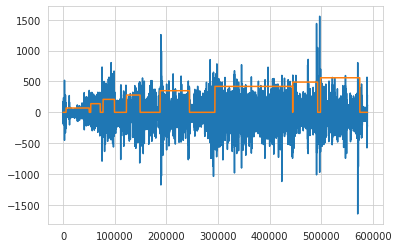

In [28]:
plot_activite_elec(df_wrist,'BVP',70)

Rapport :  1.0


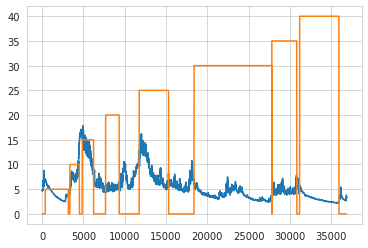

In [29]:
plot_activite_elec(df_wrist,'EDA',5)

Rapport :  1.0


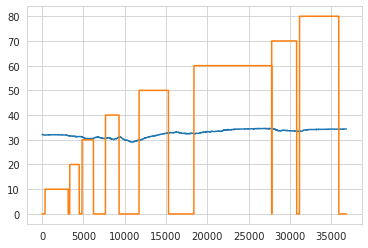

In [30]:
plot_activite_elec(df_wrist,'TEMP',10)

In [31]:
#Pour mieux visualiser
df_wrist['TEMP'].describe()

#La température moyenne est de 32 degrés

count    36848.000000
mean        32.660227
std          1.531514
min         29.090000
25%         31.370000
50%         32.910000
75%         34.150000
max         34.610000
Name: TEMP, dtype: float64

#Analyse groupée : 

In [32]:
"""
k = [1,2,3,4]
l = ["a","b","c","d"]

for i in range(len(k)):
  exec(str(l[i]+"="+str(pd.read_pickle(chemin))))
print(a)
"""

'\nk = [1,2,3,4]\nl = ["a","b","c","d"]\n\nfor i in range(len(k)):\n  exec(str(l[i]+"="+str(pd.read_pickle(chemin))))\nprint(a)\n'

##Analyse des individus :

In [0]:
#fusion des datas sur les individus
questionnaire = pd.DataFrame()
for i in range(1,16):
  chemin = "./PPG_FieldStudy/S"+str(i)+"/S"+str(i)+".pkl"
  print(chemin)
  df = pd.read_pickle(chemin)
  questionnaire = questionnaire.append(pd.DataFrame(data=[df['questionnaire']]))

In [0]:
questionnaire.reset_index(drop = True, inplace = True)
questionnaire

In [0]:
#Pour les valeurs numériques
questionnaire.describe()

L'âge minimum est 21 ans et l'âge maximum est 55 ans.

In [0]:
questionnaire['Gender'].value_counts().plot(kind='barh')
#Presque autant d'hommes que de femmes

In [0]:
questionnaire['SPORT'].value_counts().plot(kind='barh')
#Sport représente le niveau sportif, Nous avons beaucoup de sportifs (Catégorie 6 et 5) que des non sportifs

‘activity’: includes the activity labels, providing IDs 0…8 (see activity list in Section II). These
activity labels are based on the file SX_activity.csv. However, in order to make further
processing of the dataset more convenient, an activity-signal with 4 Hz sampling rate (which
is the lowest sampling rate across all recorded raw sensor data) was created.
- ‘label’: includes the ground truth heart rate information. As described above, this is provided
as the mean of the ECG-based instantaneous heart rate, given on a sliding window of 8
seconds, shifted with 2 seconds.
- ‘questionnaire’: includes information about the subject, extracted from SX_quest.csv. Details
were given above, in Section I.4.
- ‘rpeaks’: the index of the identified and corrected R-peaks, referring to the ECG-signal. As
described above, the identified R-peaks provide the basis of the heart rate ground truth.
- ‘signal’: includes all the synchronised raw data, in two fields:
o ‘chest’: RespiBAN data (all the modalities: ACC, ECG, EDA, EMG, RESP, TEMP). As
mentioned above, the modalities ‘EDA’, ‘EMG’ and ‘Temp’ only include dummy data
and should thus be ignored.
o ‘wrist’: Empatica E4 data (all the modalities: ACC, BVP, EDA, TEMP)
- ‘subject’: the current subject’s ID


In [0]:
plot_activite_elec(df_wrist,'BVP',70)

## Création de la dataset avec tous les individus

La dataset data contient :
- df['questionnaire']
- df['label']
- df ['activity']
- df['signal']

In [0]:
#Divisé en deux : Chest et wrist 
def transform_dfchest(df):
  df_chest = pd.DataFrame() 
  for i in df.get('signal').get('chest').keys(): 
    column = df.get('signal').get('chest').get(i) 
    df_chest[i] = column.tolist()

  for i in df_chest.keys():
    if (i == 'ACC'):
      acc1 = df_chest[i].apply(lambda x: x[0])
      acc2 = df_chest[i].apply(lambda x: x[1])
      acc3 = df_chest[i].apply(lambda x: x[2])
      df_chest['ACC1'] = acc1
      df_chest['ACC2'] = acc2
      df_chest['ACC3'] = acc3
    else:
      new_data = df_chest[i].apply(lambda x: x[0])
      df_chest[i]=new_data
  df_chest = df_chest.drop('ACC',axis=1)
  return df_chest

In [0]:
def transform_dfwrist(df):
  df_wrist = pd.DataFrame()
  for i in df.get('signal').get('wrist').keys():
    column = df.get('signal').get('wrist').get(i)
    if(i == 'ACC'):
      name_column = ['ACC1','ACC2','ACC3']
    else:
      name_column = [i]
    column = pd.DataFrame(column, columns=name_column)
    if(i=='BVP'):
      column =  column[np.mod(np.arange(column.index.size),2)==0]
    if (i=='EDA' or i =='TEMP'):
      column = column
    else:
      column =  column[np.mod(np.arange(column.index.size),8)==0]
  
    column.reset_index(drop=True, inplace=True)

    df_wrist = pd.concat((df_wrist,column), axis=1)
    #W pour wrist
  df_wrist.columns = ['wACC1', 'wACC2', 'wACC3', 'wBVP', 'wEDA', 'wTEMP']
  return df_wrist

In [74]:
transform_dfwrist(df).isna().sum()

wACC1    0
wACC2    0
wACC3    0
wBVP     0
wEDA     0
wTEMP    0
dtype: int64

In [45]:
df_wrist.columns

Index(['ACC1', 'ACC2', 'ACC3', 'BVP', 'EDA', 'TEMP'], dtype='object')

In [78]:
#df_activity = pd.DataFrame(columns = ['activity','Gender'])
activity = pd.DataFrame(df['activity'],columns=['activity'])
datafinal = pd.DataFrame()
for i in range(1,16):
  chemin = "./PPG_FieldStudy/S"+str(i)+"/S"+str(i)+".pkl"
  print(chemin)
  df = pd.read_pickle(chemin)

  #Heart Rate
  df_label = pd.DataFrame()
  for ligne in df['label']:
    df_label = df_label.append([ligne]*8)
  df_label.columns = ['label']
  print("df_label : ",len(df_label))

  #Numéro du sujet
  df_subject = pd.DataFrame()

  #Caractéristique du sujet

  d = pd.DataFrame([df['questionnaire']])
  df_subject = pd.DataFrame([df['subject']])

  quest = pd.concat([d]*len(df['activity']),ignore_index=True)
  df_label.reset_index(drop=True, inplace=True)
  print("df_label + personne : ",len(quest))

    #Ajout de df[chest]
  df_chest = transform_dfchest(df)
  df_chest_2 = pd.DataFrame()
  df_chest_2 = df_chest[np.mod(np.arange(df_chest.index.size),175)==0]

  #da = datafinal.copy()
  #da.reset_index(drop=True, inplace=True)
  df_chest_2.reset_index(drop=True, inplace=True)

  #Fusion de Ajout de df['signal']

  wrist = transform_dfwrist(df)
  wrist.reset_index(drop=True, inplace=True)

  #Fusion des datasets avec df['activity']
  datasubject = pd.concat([quest,pd.DataFrame(df['activity'],columns=['Activity']),df_label,df_chest_2,wrist],axis=1)
  print("df_label + personne + activity + chest2 + wrist : ",len(datasubject))

  datasubject.reset_index(drop=True, inplace=True)

  #Ajout du sujet dans le dataset final

  datafinal =pd.concat([datafinal,datasubject],axis = 0)


./PPG_FieldStudy/S1/S1.pkl
df_label :  36824
df_label + personne :  36848
df_label + personne + activity + chest2 + wrist :  36848
./PPG_FieldStudy/S2/S2.pkl
df_label :  32792
df_label + personne :  32820
df_label + personne + activity + chest2 + wrist :  32820
./PPG_FieldStudy/S3/S3.pkl
df_label :  34936
df_label + personne :  34964
df_label + personne + activity + chest2 + wrist :  34964
./PPG_FieldStudy/S4/S4.pkl
df_label :  36576
df_label + personne :  36600
df_label + personne + activity + chest2 + wrist :  36600
./PPG_FieldStudy/S5/S5.pkl
df_label :  37192
df_label + personne :  37220
df_label + personne + activity + chest2 + wrist :  37220
./PPG_FieldStudy/S6/S6.pkl
df_label :  20976
df_label + personne :  21000
df_label + personne + activity + chest2 + wrist :  21000
./PPG_FieldStudy/S7/S7.pkl
df_label :  37344
df_label + personne :  37372
df_label + personne + activity + chest2 + wrist :  37372
./PPG_FieldStudy/S8/S8.pkl
df_label :  32296
df_label + personne :  32320
df_label 

In [82]:
import pandas as pd
import numpy as np
datafinal = datafinal.dropna()
datafinal.isna().sum()

WEIGHT      0
Gender      0
AGE         0
HEIGHT      0
SKIN        0
SPORT       0
Activity    0
label       0
ECG         0
EMG         0
EDA         0
Temp        0
Resp        0
ACC1        0
ACC2        0
ACC3        0
wACC1       0
wACC2       0
wACC3       0
wBVP        0
wEDA        0
wTEMP       0
dtype: int64

In [86]:
datafinal

,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Activity,label,ECG,EMG,EDA,Temp,Resp,ACC1,ACC2,ACC3,wACC1,wACC2,wACC3,wBVP,wEDA,wTEMP
0,78.0,m,34,182.0,3,6,0.0,49.611369,0.015610,-1.5,0.0,-273.149994,4.441833,0.8564,-0.0678,-0.3656,-0.765625,-0.078125,0.671875,7.28,4.722437,32.13
1,78.0,m,34,182.0,3,6,0.0,49.611369,-0.015747,-1.5,0.0,-273.149994,4.876709,0.8514,-0.0654,-0.3688,-0.765625,-0.078125,0.671875,-11.36,4.728843,32.16
2,78.0,m,34,182.0,3,6,0.0,49.611369,-0.008743,-1.5,0.0,-273.149994,3.340149,0.8514,-0.0662,-0.3708,-0.765625,-0.078125,0.671875,-51.27,4.718594,32.16
3,78.0,m,34,182.0,3,6,0.0,49.611369,-0.339523,-1.5,0.0,-273.149994,0.740051,0.8594,-0.0632,-0.3640,-0.750000,-0.078125,0.671875,5.65,4.717312,32.16
4,78.0,m,34,182.0,3,6,0.0,49.611369,-0.089905,-1.5,0.0,-273.149994,-1.475525,0.8510,-0.0674,-0.3694,-0.765625,-0.078125,0.671875,34.34,4.713469,32.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31723,79.0,m,28,183.0,2,5,0.0,80.853007,-1.126144,-1.5,0.0,-273.149994,-0.257874,0.8942,0.0204,-0.2178,-0.296875,-0.015625,0.937500,25.31,0.931639,34.00
31724,79.0,m,28,183.0,2,5,0.0,80.853007,0.322678,-1.5,0.0,-273.149994,-0.440979,0.8986,0.0138,-0.2318,-0.296875,-0.015625,0.953125,1.58,0.931639,34.00
31725,79.0,m,28,183.0,2,5,0.0,80.853007,-0.133118,-1.5,0.0,-273.149994,-0.627136,0.8952,0.0124,-0.2252,-0.015625,-0.015625,1.015625,-31.06,0.931639,34.00
31726,79.0,m,28,183.0,2,5,0.0,80.853007,-0.416519,-1.5,0.0,-273.149994,-0.543213,0.8968,0.0146,-0.2274,-0.171875,1.656250,1.984375,24.94,0.923953,34.00


In [0]:
datafinal.reset_index()
datafinal.to_csv('data.csv', sep='\t', encoding='utf-8')

## Analyse des signaux :

In [0]:
#A faire

# Machine learning

In [0]:
import pandas as pd
datafinal = pd.read_csv('data.csv',encoding='latin1',sep = '\t',index_col=0)
datafinal.reset_index()

In [88]:
datafinal
datafinal.reset_index()

,index,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Activity,label,ECG,EMG,EDA,Temp,Resp,ACC1,ACC2,ACC3,wACC1,wACC2,wACC3,wBVP,wEDA,wTEMP
0,0,78.0,m,34,182.0,3,6,0.0,49.611369,0.015610,-1.5,0.0,-273.149994,4.441833,0.8564,-0.0678,-0.3656,-0.765625,-0.078125,0.671875,7.28,4.722437,32.13
1,1,78.0,m,34,182.0,3,6,0.0,49.611369,-0.015747,-1.5,0.0,-273.149994,4.876709,0.8514,-0.0654,-0.3688,-0.765625,-0.078125,0.671875,-11.36,4.728843,32.16
2,2,78.0,m,34,182.0,3,6,0.0,49.611369,-0.008743,-1.5,0.0,-273.149994,3.340149,0.8514,-0.0662,-0.3708,-0.765625,-0.078125,0.671875,-51.27,4.718594,32.16
3,3,78.0,m,34,182.0,3,6,0.0,49.611369,-0.339523,-1.5,0.0,-273.149994,0.740051,0.8594,-0.0632,-0.3640,-0.750000,-0.078125,0.671875,5.65,4.717312,32.16
4,4,78.0,m,34,182.0,3,6,0.0,49.611369,-0.089905,-1.5,0.0,-273.149994,-1.475525,0.8510,-0.0674,-0.3694,-0.765625,-0.078125,0.671875,34.34,4.713469,32.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517571,31723,79.0,m,28,183.0,2,5,0.0,80.853007,-1.126144,-1.5,0.0,-273.149994,-0.257874,0.8942,0.0204,-0.2178,-0.296875,-0.015625,0.937500,25.31,0.931639,34.00
517572,31724,79.0,m,28,183.0,2,5,0.0,80.853007,0.322678,-1.5,0.0,-273.149994,-0.440979,0.8986,0.0138,-0.2318,-0.296875,-0.015625,0.953125,1.58,0.931639,34.00
517573,31725,79.0,m,28,183.0,2,5,0.0,80.853007,-0.133118,-1.5,0.0,-273.149994,-0.627136,0.8952,0.0124,-0.2252,-0.015625,-0.015625,1.015625,-31.06,0.931639,34.00
517574,31726,79.0,m,28,183.0,2,5,0.0,80.853007,-0.416519,-1.5,0.0,-273.149994,-0.543213,0.8968,0.0146,-0.2274,-0.171875,1.656250,1.984375,24.94,0.923953,34.00


In [0]:
d = datafinal
d.dtypes

In [0]:
d

In [0]:
a = list(d.columns)
a.remove('Activity')
a

In [92]:
target = 'Activity'
d['Gender'] = d['Gender'].apply(lambda r : True if (r == 'f') else False)

X = d[a]
y = d[target]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
d.astype('float32').dtypes

In [0]:
d.Activity.astype(int)

## Random Forest

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


regressor = RandomForestRegressor(n_estimators=20, random_state=67,n_jobs=2)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [0]:
print(y_pred)

In [0]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [0]:
y_testint = []
[y_testint.append(int(i)) for i in y_test]


y_predint = []
[y_predint.append(int(round(i))) for i in y_pred]

In [97]:
from collections import Counter

Counter(y_testint).keys() # equals to list(set(words))
Counter(y_testint).values() # counts the elements' frequency

dict_values([7285, 5625, 13557, 5270, 27953, 21841, 3714, 10665, 7606])

In [0]:
def matrice_confusion(y_testint,y_predint):
  import numpy as np
  import matplotlib.pyplot as plt

  from sklearn.metrics import plot_confusion_matrix
  from mlxtend.plotting import plot_confusion_matrix
  from sklearn.metrics import confusion_matrix

  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_testint, y_predint),
                                colorbar=True,
                                figsize= (15,15),
                                show_absolute=False,
                                show_normed=True)
  

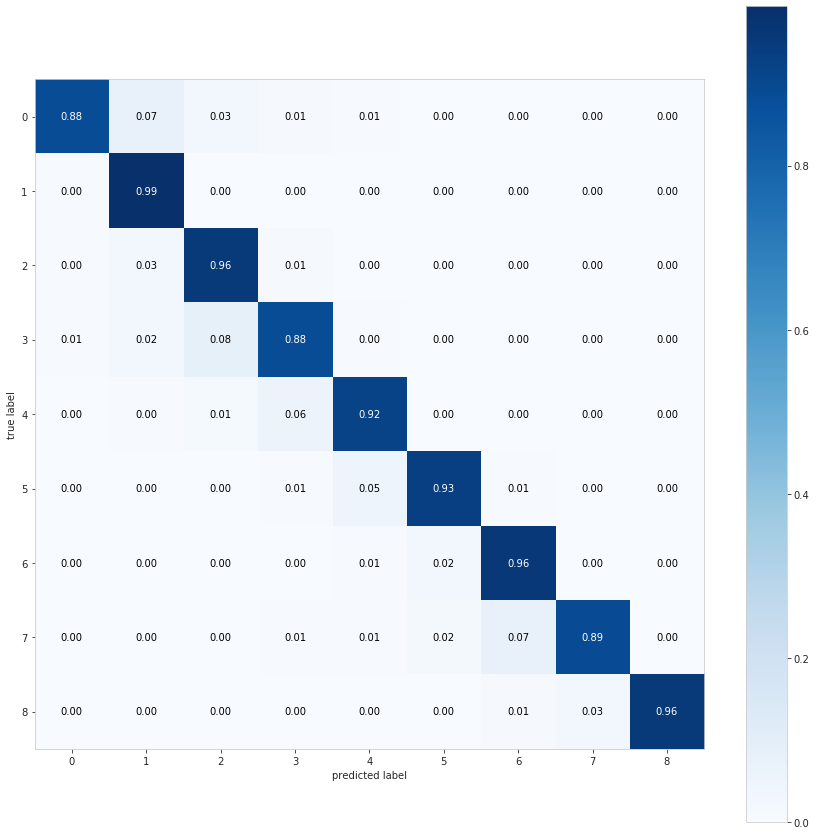

In [126]:
matrice_confusion(y_testint,y_predint)

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_testint, y_predint)

0.9281946752192898

In [0]:
#Variables importantes
feature_imp = pd.Series(regressor.feature_importances_,index=a).sort_values(ascending=False)
feature_imp

No handles with labels found to put in legend.


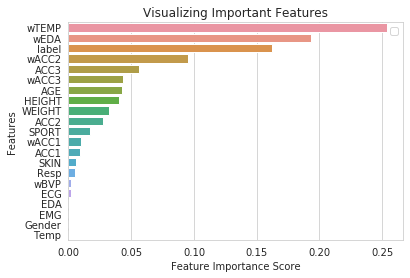

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Regression logistique

In [132]:
#Link : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.linear_model import LogisticRegressionCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_testint = []
[y_testint.append(int(i)) for i in y_test]


y_predint = []
[y_predint.append(int(round(i))) for i in y_pred]
accuracy_score(y_testint, y_predint)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.44048263070443217